## Importa bibliotecas


In [2]:
!pip3 install graphviz
# !brew install graphviz
# !pip3 install python-graphviz

In [4]:
!pip install pygraphviz

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
from datetime import datetime
# import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import graphviz

## Le arquivo

In [7]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [8]:
colunas = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados = dados.rename(columns=colunas)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [9]:
trocar = {
    'yes': 1,
    'no': 0
}
dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [10]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [11]:
milhas_por_km = 1.60934

dados['km_por_ano'] = dados.milhas_por_ano * milhas_por_km
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [12]:
dados = dados.drop(columns = ['Unnamed: 0',
                              'milhas_por_ano', 'ano_do_modelo'],
                   axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [13]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [14]:
SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print("Acuracia: {}%".format(accuracy_score(teste_y, previsoes) * 100))


Acuracia: 58.36%


/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:

np.random.seed(SEED)
dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)
# previsoes_dummy = dummy_stratified.predict(teste_x)
print("Acuracia: {}%".format(acuracia * 100))


Acuracia: 51.92%


In [16]:
dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)
# previsoes_dummy = dummy_most_frequent.predict(teste_x)
print("Acuracia: {}%".format(acuracia * 100))


Acuracia: 50.63999999999999%


In [17]:
SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

# escala valores
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

# previsoes = modelo.predict(teste_x)
acuracia = modelo.score(teste_x, teste_y)
print("Acuracia: {}%".format(acuracia * 100))


/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/luanandrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/luanandrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Acuracia: 75.92%


In [32]:
SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

# escala valores
# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)

# previsoes = modelo.predict(teste_x)
acuracia = modelo.score(raw_teste_x, teste_y)
print("Acuracia: {}%".format(acuracia * 100))

Acuracia: 75.84%


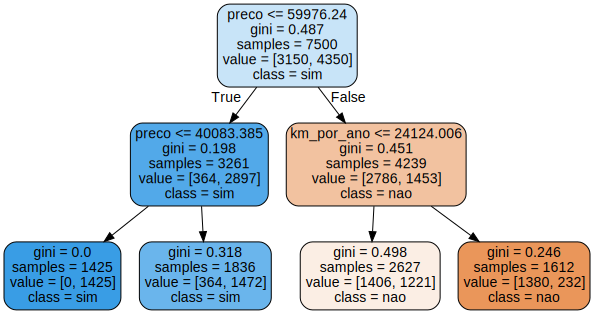

In [33]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                          filled= True, rounded=True,
                          class_names=['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico